# What does R^2 tell us?

In this notebook I'll narrow down what the $r^2$ regression value tells us when we're doing readout identification in a brain network disese.


In [43]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
matplotlib.rcParams['figure.figsize'] = [20, 15]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, interactive, fixed



In [135]:
N = 50
T = 1000
Gamma = np.random.normal(0,1,size=(N,1))
coverage = 0.5
H = np.random.choice([0,1],(N,1),p=[1-coverage,coverage]) * Gamma

X = np.random.normal(0,2,size=(N,T))
Y = np.dot(H.T,X)
beta = np.dot(Gamma.T,X)

[[0.76431173]]
L1: 8107.970199534386


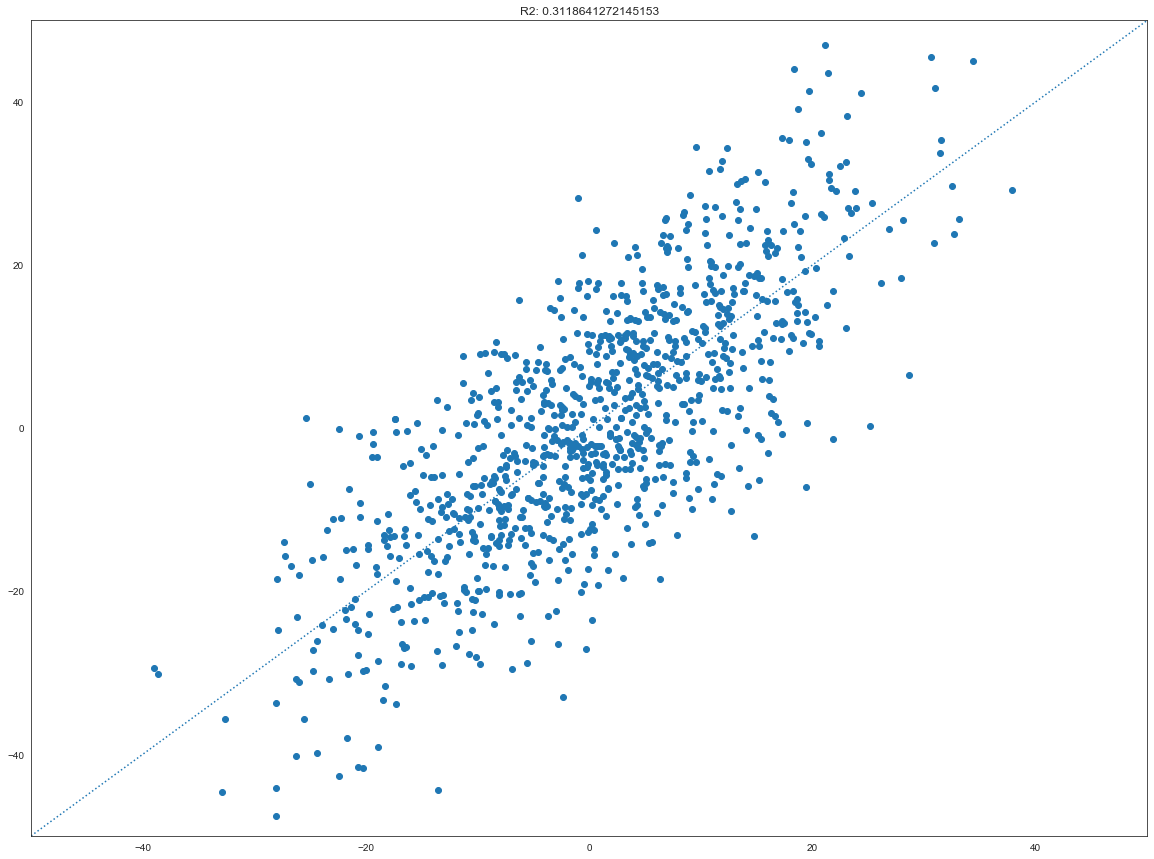

In [136]:
#Do linear regression model
readout_model = LinearRegression().fit(Y,beta)
r2_fit_pva = r2_score(Y.T,beta.T)

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(Y,beta))
from scipy.spatial import distance
print('L1: ' + str(distance.cityblock(Y,beta)))

plt.title('R2: ' + str(r2_fit_pva))
plt.scatter(Y,beta)
plt.plot([-100,100],[-100,100],linestyle='dotted')
plt.ylim((-50,50))
plt.xlim((-50,50))
plt.show()

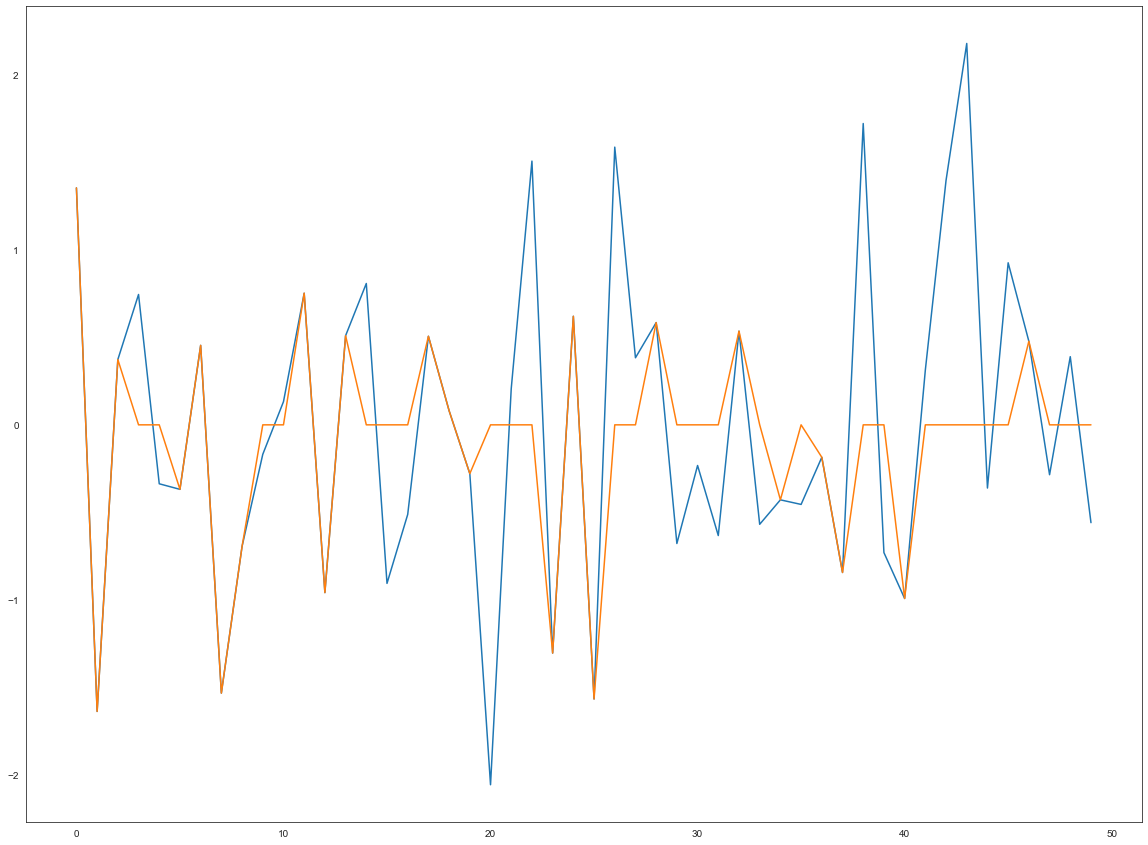

In [108]:
plt.plot(Gamma)
plt.plot(H)